In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
prva = pd.read_csv('prva.csv')
vtora = pd.read_csv('vtora.csv')

In [3]:
y = prva['Primil lek ili ne'].to_numpy()
X = prva[['Merenje 1', 'Merenje 2']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

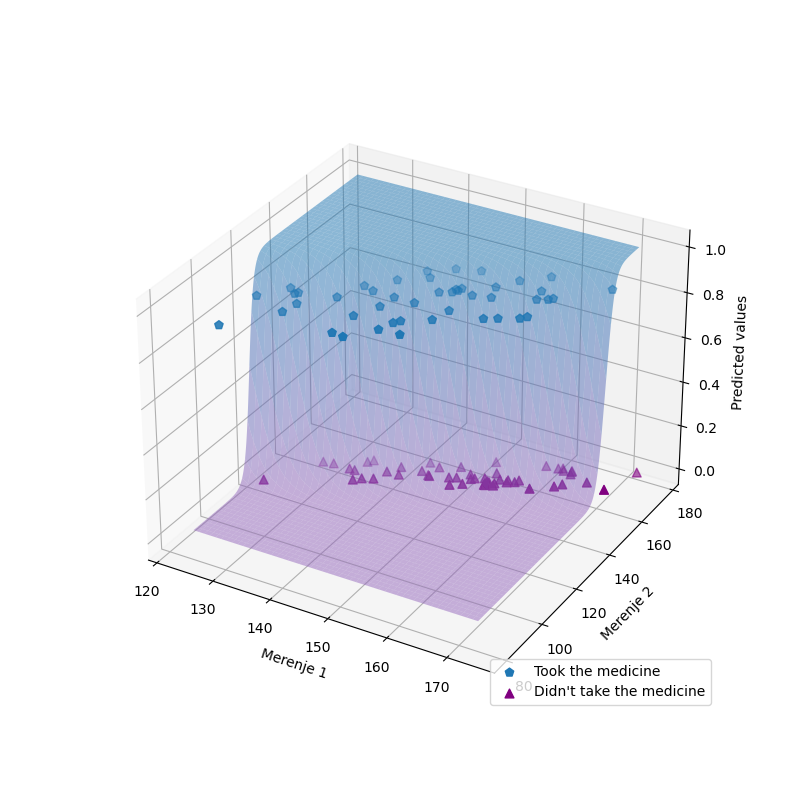

In [4]:
import ipympl

%matplotlib widget

# Color-coding the data for the 3D scatter plot
xm = vtora.loc[vtora['Kategorizacija'] == 1]['Merenje 1']
ym = vtora.loc[vtora['Kategorizacija'] == 1]['Merenje 2']
zm = vtora.loc[vtora['Kategorizacija'] == 1]['Kategorizacija']

xf = vtora.loc[vtora['Kategorizacija'] == 0]['Merenje 1']
yf = vtora.loc[vtora['Kategorizacija'] == 0]['Merenje 2']
zf = vtora.loc[vtora['Kategorizacija'] == 0]['Kategorizacija']

# Creating the surface for the model
xs = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 1000)
ys = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model.intercept_[0]
b_h = model.coef_[0][0]
b_w = model.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_h*xs + b_w*ys))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:purple', 'tab:blue'])

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(xm, ym, zm, marker='p', s=40, label = 'Took the medicine')
ax2.scatter(xf, yf, zf, marker='^', s=40, color='purple', label = "Didn't take the medicine")
ax2.set_xlabel('Merenje 1')
ax2.set_ylabel('Merenje 2')
ax2.set_zlabel('Predicted values')
ax2.legend(loc='lower right')
plt.show()